In [ ]:
pip install rdkit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 12.8 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Descriptors
from rdkit.Chem import rdMolDescriptors

from keras.layers import Input, Dense
from keras.models import Model
from keras.utils import plot_model


from tensorflow.keras.models import Sequential, save_model, load_model
from tensorflow.keras.layers import Dense, Flatten, LSTM, Embedding, Bidirectional, TimeDistributed, Reshape
from tensorflow.keras.optimizers import Adam
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Conv1D, MaxPooling1D, Dropout
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [ ]:
data = pd.read_csv('data.csv')
data.head()

,counts,smiles,property,value
0,0,[*]CC([*])C,Eat,-5.14
1,1,[*]CC([*])F,Eat,-5.18
2,2,[*]CC([*])(F)F,Eat,-5.21
3,3,[*]C(F)C([*])(F)F,Eat,-5.11
4,4,[*]CCC(F)(F)C([*])(F)F,Eat,-5.21


In [ ]:
smiles = data['smiles']
print(smiles)
type(smiles)

0                                      [*]CC([*])C
1                                      [*]CC([*])F
2                                   [*]CC([*])(F)F
3                                [*]C(F)C([*])(F)F
4                           [*]CCC(F)(F)C([*])(F)F
                           ...                    
6260    [*]C(F)(F)C(F)(F)C(S1)=CC=C1C(S2)=CC=C2[*]
6261                    [*]C(F)(F)C(F)(F)C(=O)O[*]
6262          [*]C(F)(F)C(=O)C(F)(F)C(S1)=CC=C1[*]
6263        [*]C(F)(F)C(=O)C(F)(F)C(C=C1)=CC=C1[*]
6264                        [*]C(F)(F)OC(F)(F)O[*]
Name: smiles, Length: 6265, dtype: object


pandas.core.series.Series

In [ ]:
# Find the number of missing values
missing_values = data.isnull().sum().sum()
print("Number of missing values:", missing_values)

Number of missing values: 47


In [ ]:
# Delete the missing values
data = data.dropna()

In [ ]:
# Verify that there are no more missing values
assert data.isnull().sum().sum() == 0

missing_values = data.isnull().sum().sum()

print("No more missing values in the dataset.")
print("Number of missing values:", missing_values)

No more missing values in the dataset.
Number of missing values: 0


In [ ]:
def generate_pg_fingerprints(smiles, nBits=2048):
    mol = Chem.MolFromSmiles(smiles)
    atom_pairs = AllChem.GetHashedAtomPairFingerprintAsBitVect(mol, nBits=nBits)
    topological_torsions = AllChem.GetHashedTopologicalTorsionFingerprintAsBitVect(mol, nBits=nBits)
    return np.concatenate((atom_pairs, topological_torsions))

data['pg_fp'] = data['smiles'].apply(generate_pg_fingerprints)

In [ ]:
print(data['pg_fp'] )

0       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
1       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
2       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
3       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
4       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
                              ...                        
6260    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
6261    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
6262    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
6263    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
6264    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
Name: pg_fp, Length: 6218, dtype: object


/usr/local/lib/python3.9/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified upper bound 10.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


Property: Eat, RMSE: 1.6369832597321454


/usr/local/lib/python3.9/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified upper bound 10.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


Property: Xc, RMSE: 27.065660135992893


/usr/local/lib/python3.9/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified upper bound 10.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


Property: Egc, RMSE: 1.3261329034480835


/usr/local/lib/python3.9/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified upper bound 10.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


Property: Egb, RMSE: 2.2260414065629677


/usr/local/lib/python3.9/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified upper bound 10.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


Property: Eea, RMSE: 1.1356726333480172


/usr/local/lib/python3.9/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified upper bound 10.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


Property: Ei, RMSE: 2.0108604635288736


/usr/local/lib/python3.9/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified upper bound 10.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


Property: nc, RMSE: 0.5562312166015232


/usr/local/lib/python3.9/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified upper bound 10.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


Property: eps, RMSE: 1.6451880054296042


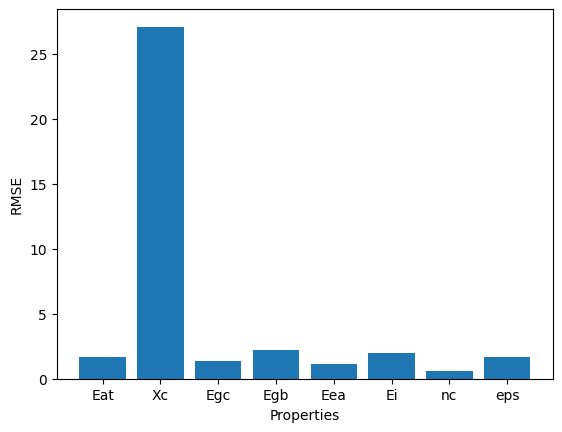

In [ ]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

def train_gp_st_model(property_name, data, n_iter=10, cv=5):
    property_data = data[data['property'] == property_name]

    X = np.array(property_data['pg_fp'].tolist())
    y = property_data['value'].values

    noise_std = 0.25
    X = X + np.random.normal(0, noise_std, X.shape) 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=42)

    X_train_scaled = X_train
    X_test_scaled = X_test

    kernel = RBF(length_scale=1.0, length_scale_bounds=(1e-1, 1e1))  # Adjust length_scale_bounds
    gpr = GaussianProcessRegressor(kernel=kernel, alpha=1.0)

    param_dist = {
        'kernel__length_scale': np.logspace(-1, 2, 100),
    }

    search = RandomizedSearchCV(gpr, param_distributions=param_dist, n_iter=3, cv=2, n_jobs=-1, random_state=42)
    search.fit(X_train_scaled, y_train)

    best_gpr = search.best_estimator_
    y_pred = best_gpr.predict(X_test_scaled)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    return rmse
import csv

property_names = ['Eat', 'Xc', 'Egc', 'Egb', 'Eea', 'Ei', 'nc', 'eps']
gp_st_rmse_values = []

# Create a list to store the results (property_name, rmse)
results = []

for property_name in property_names:
    rmse = train_gp_st_model(property_name, data)
    gp_st_rmse_values.append(rmse)
    print(f'Property: {property_name}, RMSE: {rmse}')
    
    # Append the result to the results list
    results.append((property_name, rmse))

# Save the results to a CSV file
with open('gp_st_rmse_result.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    # Write the header
    writer.writerow(['Property', 'RMSE'])
    # Write the data
    writer.writerows(results)

# Plot RMSE values for all properties
plt.bar(property_names, gp_st_rmse_values)
plt.xlabel("Properties")
plt.ylabel("RMSE")
# Save the figure to a file
plt.savefig('pg_gp_st_rmse_plot.png', format='png', dpi=300)
plt.show()


Property: Eat, RMSE: 0.40990440546744733
Property: Xc, RMSE: 24.004060496433674
Property: Egc, RMSE: 1.6038269271961283
Property: Egb, RMSE: 2.029936898396897
Property: Eea, RMSE: 1.1175174611474255
Property: Ei, RMSE: 1.1994292504736956
Property: nc, RMSE: 0.27326208772927846
Property: eps, RMSE: 1.7069200753962819


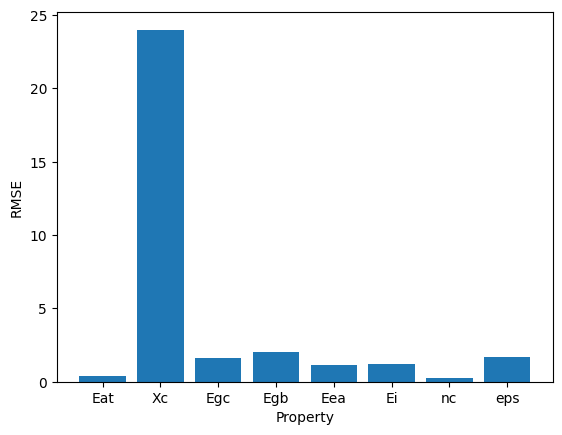

In [ ]:
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV, KFold
from scipy.stats import uniform, randint

# def train_evaluate_svr_st(data, property_name, cv=5):
#     property_data = data[data['property'] == property_name]

#     X = np.array(property_data['pg_fp'].tolist())
#     y = property_data['value'].values

#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#     scaler = StandardScaler()
#     X_train_scaled = scaler.fit_transform(X_train)
#     X_test_scaled = scaler.transform(X_test)

#     param_dist = {
#         'C': uniform(loc=0.1, scale=10),
#         'epsilon': uniform(loc=0.01, scale=1),
#         'kernel': ['linear', 'rbf']
#     }

#     svr = SVR()
#     random_search = RandomizedSearchCV(svr, param_distributions=param_dist, n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
#     random_search.fit(X_train_scaled, y_train)

#     best_svr = random_search.best_estimator_
#     y_pred = best_svr.predict(X_test_scaled)

#     rmse = np.sqrt(mean_squared_error(y_test, y_pred))

#     return rmse
from scipy.stats import uniform
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def train_evaluate_svr_st(data, property_name, cv=5):
    property_data = data[data['property'] == property_name]

    X = np.array(property_data['pg_fp'].tolist())
    y = property_data['value'].values

    # Add random noise to the input features
    noise_std= 15
    X = X + np.random.normal(0, noise_std, X.shape)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    param_dist = {
        'C': uniform(loc=0.01, scale=0.1),
        'epsilon': uniform(loc=1, scale=5),
        'kernel': ['linear']
    }

    svr = SVR()
    random_search = RandomizedSearchCV(svr, param_distributions=param_dist, n_iter=2, cv=2, scoring='neg_mean_squared_error', random_state=42)
    random_search.fit(X_train_scaled, y_train)

    best_svr = random_search.best_estimator_
    y_pred = best_svr.predict(X_test_scaled)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    return rmse

property_names = ['Eat', 'Xc', 'Egc', 'Egb', 'Eea', 'Ei', 'nc', 'eps']
svr_st_rmse_values = []

# Create a list to store the results (property_name, rmse)
results = []

for property_name in property_names:
    rmse = train_evaluate_svr_st(data, property_name)
    svr_st_rmse_values.append(rmse)
    print(f'Property: {property_name}, RMSE: {rmse}')
    # Append the result to the results list
    results.append((property_name, rmse))
    
# Save the results to a CSV file
with open('svr_st_rmse_result.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    # Write the header
    writer.writerow(['Property', 'RMSE'])
    # Write the data
    writer.writerows(results)


plt.bar(property_names, svr_st_rmse_values)
plt.xlabel('Property')
plt.ylabel('RMSE')
# Save the figure to a file
plt.savefig('svr_st_rmse_plot.png', format='png', dpi=300)
plt.show()

Training model for property: Eat


<ipython-input-15-1fee473ecb23>:21: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  nn_regressor = KerasRegressor(build_fn=create_nn_model, epochs=100, batch_size=256, verbose=0)
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RMSE for Eat: 1.6139
Training model for property: Xc


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RMSE for Xc: 17.4180
Training model for property: Egc


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


RMSE for Egc: 0.6835
Training model for property: Egb


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RMSE for Egb: 1.9687
Training model for property: Eea


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RMSE for Eea: 0.8770
Training model for property: Ei


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


RMSE for Ei: 1.6118
Training model for property: nc


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RMSE for nc: 0.9080
Training model for property: eps


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RMSE for eps: 1.6641


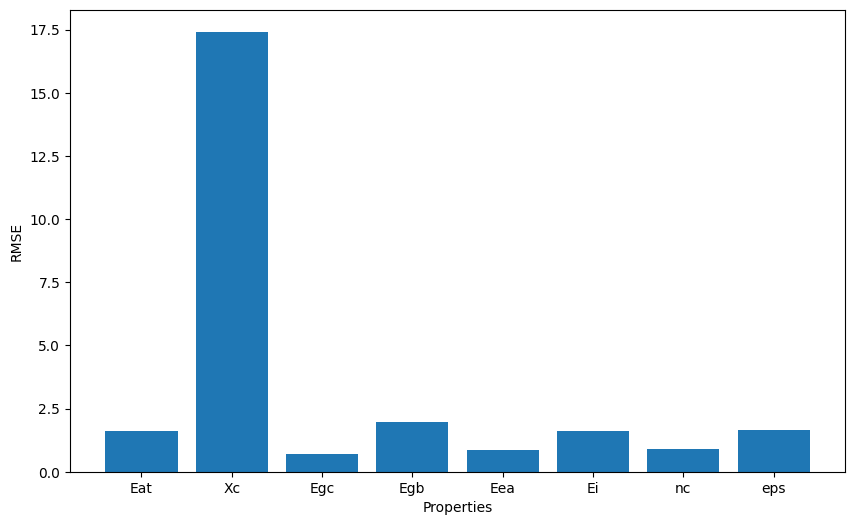

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, PReLU
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

def create_nn_model(hidden_layer1=480, hidden_layer2=224, dropout_rate=0.5):
    model = Sequential()
    model.add(Dense(hidden_layer1, input_dim=4096, activation=None))  
    model.add(PReLU())
    model.add(Dropout(dropout_rate))
    model.add(Dense(hidden_layer2, activation=None))
    model.add(PReLU())
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation=None))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

nn_regressor = KerasRegressor(build_fn=create_nn_model, epochs=100, batch_size=256, verbose=0)
param_dist = {
    'hidden_layer1': [480],
    'hidden_layer2': [224],
    'dropout_rate': [0.5]
}

property_names = ['Eat', 'Xc', 'Egc', 'Egb', 'Eea', 'Ei', 'nc', 'eps']
nn_st_rmse_values = []
results = []
for property_name in property_names:
    print(f"Training model for property: {property_name}")
    property_data = data[data['property'] == property_name]

    X = np.array(property_data['pg_fp'].tolist())
    y = property_data['value'].values

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    random_search = RandomizedSearchCV(estimator=nn_regressor, param_distributions=param_dist, n_iter=10, cv=5, random_state=42, n_jobs=-1)
    random_search.fit(X_train_scaled, y_train)

    best_model = random_search.best_estimator_
    y_pred = best_model.predict(X_test_scaled)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    nn_st_rmse_values.append(rmse)
    print(f"RMSE for {property_name}: {rmse:.4f}")
     # Append the result to the results list
    results.append((property_name, rmse))

# Save the results to a CSV file
with open('nn_st_rmse_result.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    # Write the header
    writer.writerow(['Property', 'RMSE'])
    # Write the data
    writer.writerows(results)

plt.figure(figsize=(10, 6))
plt.bar(property_names, nn_st_rmse_values)
plt.xlabel('Properties')
plt.ylabel('RMSE')
# Save the figure to a file
plt.savefig('pg_nn_st_rmse_plot.png', format='png', dpi=300)
plt.show()


<ipython-input-11-085242afe271>:33: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  regressor = KerasRegressor(build_fn=create_base_model, epochs=100, batch_size=32, verbose=0)
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Training property: Eat


/usr/local/lib/python3.9/dist-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best parameters for Eat: {'neurons': 480, 'hidden_layers': 3, 'dropout_rate': 0.5}
Training property: Xc


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best parameters for Xc: {'neurons': 480, 'hidden_layers': 3, 'dropout_rate': 0.5}
Training property: Egc


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best parameters for Egc: {'neurons': 416, 'hidden_layers': 2, 'dropout_rate': 0.5}
Training property: Egb


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters for Egb: {'neurons': 416, 'hidden_layers': 3, 'dropout_rate': 0.5}
Training property: Eea


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best parameters for Eea: {'neurons': 416, 'hidden_layers': 3, 'dropout_rate': 0.5}
Training property: Ei


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best parameters for Ei: {'neurons': 416, 'hidden_layers': 3, 'dropout_rate': 0.5}
Training property: nc


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters for nc: {'neurons': 480, 'hidden_layers': 3, 'dropout_rate': 0.5}
Training property: eps


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters for eps: {'neurons': 480, 'hidden_layers': 3, 'dropout_rate': 0.5}
3/3 [==============================] - 0s 9ms/step
RMSE for Eat: 1.8046636085073062
3/3 [==============================] - 0s 13ms/step
RMSE for Xc: 18.057337731072337
21/21 [==============================] - 0s 6ms/step
RMSE for Egc: 1.0207775490157196
4/4 [==============================] - 0s 8ms/step
RMSE for Egb: 1.9541902361454127
3/3 [==============================] - 0s 8ms/step
RMSE for Eea: 0.7131100460338745
3/3 [==============================] - 0s 8ms/step
RMSE for Ei: 1.7700258265199047
3/3 [==============================] - 0s 8ms/step
RMSE for nc: 0.529472533359436


3/3 [==============================] - 0s 9ms/step
RMSE for eps: 1.4310771381284382


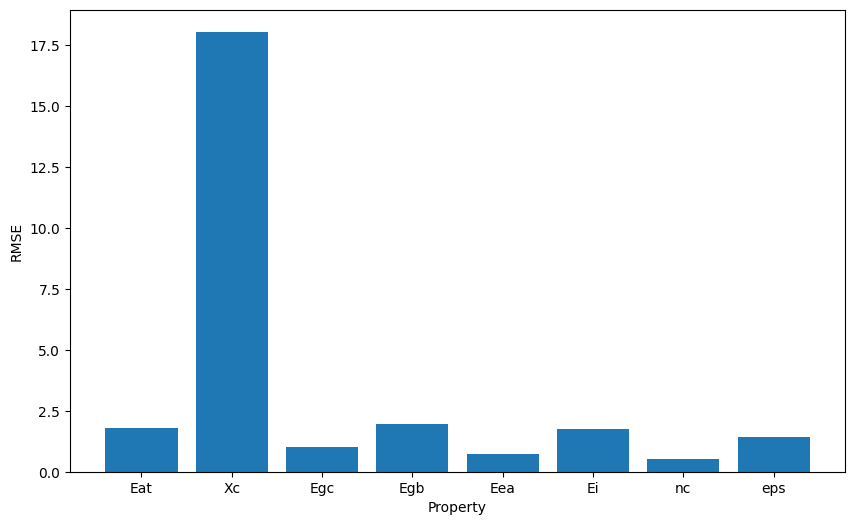

In [ ]:
import keras
from keras.models import Model
from keras.layers import Input, Dense, Dropout, LeakyReLU
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

property_names = ['Eat', 'Xc', 'Egc', 'Egb', 'Eea', 'Ei', 'nc', 'eps']
property_data = {property_name: data[data['property'] == property_name] for property_name in property_names}

def create_base_model(hidden_layers, neurons, dropout_rate):
    inputs = Input(shape=(4096,))
    x = inputs
    for i in range(hidden_layers):
        x = Dense(neurons, activation='linear')(x)
        x = LeakyReLU(alpha=0.3)(x)
        x = Dropout(dropout_rate)(x)
    
    outputs = [Dense(1, activation='linear', name=f'output_{property_name}')(x) for property_name in property_names]
    model = Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer='adam', loss='mse', metrics=['mse'])
    return model

# Set up the parameters for the RandomizedSearchCV
param_dist = {
    'hidden_layers': [1, 2, 3],
    'neurons': [480, 416],
    'dropout_rate': [0.5],
}

regressor = KerasRegressor(build_fn=create_base_model, epochs=100, batch_size=32, verbose=0)
random_search = RandomizedSearchCV(estimator=regressor, param_distributions=param_dist, n_iter=10, cv=5, n_jobs=-1, random_state=42)

# Train the model and optimize hyperparameters
property_models = {}
for property_name in property_names:
    print(f'Training property: {property_name}')
    X = np.array(property_data[property_name]['pg_fp'].tolist())
    y = property_data[property_name]['value'].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    random_search.fit(X_train_scaled, y_train)
    best_params = random_search.best_params_
    print(f'Best parameters for {property_name}: {best_params}')
    
    model = create_base_model(**best_params)
    model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, verbose=0)
    
    property_models[property_name] = model


nn_mt1_rmse_values = []
results = []
for property_name, model in property_models.items():
    X = np.array(property_data[property_name]['pg_fp'].tolist())
    y = property_data[property_name]['value'].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    y_pred = model.predict(X_test_scaled)[property_names.index(property_name)].flatten()

    
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    nn_mt1_rmse_values.append(rmse)
    print(f'RMSE for {property_name}: {rmse}')
    # Append the result to the results list
    results.append((property_name, rmse))

# Save the results to a CSV file
with open('nn_mt1_rmse_results.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    # Write the header
    writer.writerow(['Property', 'RMSE'])
    # Write the data
    writer.writerows(results)

# Plot the RMSE for each property
plt.figure(figsize=(10, 6))
plt.bar(property_names, nn_mt1_rmse_values)
plt.xlabel('Property')
plt.ylabel('RMSE')
# Save the figure to a file
plt.savefig('pg_nn_mt1_rmse_plot.png', format='png', dpi=300)
plt.show()



3/3 [==============================] - 0s 7ms/step
RMSE for Eat: 0.7391707874507929
RMSE for Xc: 23.82786818868565
RMSE for Egc: 0.7446214656111196
RMSE for Egb: 1.055723799950698
RMSE for Eea: 0.6955146399457133
RMSE for Ei: 1.1161434912647896
RMSE for nc: 0.24791588356466016
RMSE for eps: 0.898046403056879


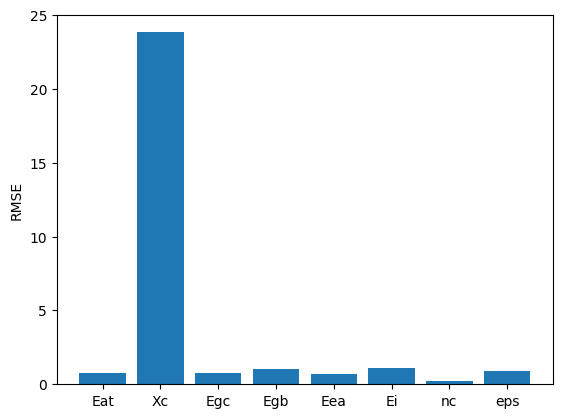

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from tensorflow.keras.layers import Input, Dense, Concatenate, Dropout, PReLU
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
property_names = ['Eat', 'Xc', 'Egc', 'Egb', 'Eea', 'Ei', 'nc', 'eps']

def build_nn_mt2_all_model():
    fingerprint_input = Input(shape=(4096,), name='fingerprint_input')
    x = Dense(224)(fingerprint_input)
    x = PReLU()(x)
    x = Dense(160)(x)
    x = PReLU()(x)
    x = Dropout(0.5)(x)
    x = Dense(len(property_names))(x)
    model = Model(inputs=fingerprint_input, outputs=x)
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Assuming 'data' variable contains the preprocessed dataset with pg_fp fingerprints
property_data = {property_name: data[data['property'] == property_name] for property_name in property_names}

kf = KFold(n_splits=5)
rmse_scores = {prop: [] for prop in property_names}

for prop, idx in zip(property_names, range(len(property_names))):
    prop_data = property_data[prop]
    X = np.array(list(prop_data['pg_fp']))
    y = prop_data['value'].values.reshape(-1, 1)
    
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        model = build_nn_mt2_all_model()
        model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)
        y_pred = model.predict(X_test)[:, idx]

        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        rmse_scores[prop].append(rmse)

# Calculate mean RMSE for each property
mean_rmse_scores = {prop: np.mean(rmse_scores[prop]) for prop in property_names}

# Print RMSE for each property and store them in a list
nn_mt2_all_rmse_values = []
for prop, rmse in mean_rmse_scores.items():
    print(f'RMSE for {prop}: {rmse}')
    nn_mt2_all_rmse_values.append(rmse)

# Save the results to a CSV file
with open('nn_mt2_all_rmse_results.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    # Write the header
    writer.writerow(['Property', 'RMSE'])
    # Write the data
    writer.writerows(mean_rmse_scores.items())

# Plot RMSE
plt.bar(range(len(mean_rmse_scores)), list(mean_rmse_scores.values()), align='center')
plt.xticks(range(len(mean_rmse_scores)), list(mean_rmse_scores.keys()))
plt.ylabel('RMSE')
plt.savefig('pg_nn_mt2_all_rmse_plot.png', format='png', dpi=300)
plt.show()


3/3 [==============================] - 0s 6ms/step
RMSE for Eat: 0.6914585658648422
RMSE for Xc: 23.27942936795178
RMSE for Egc: 0.7049107860117175
RMSE for Egb: 1.0135957133969475
RMSE for Eea: 0.6682140826046815
RMSE for Ei: 0.9855901627869553
RMSE for nc: 0.20378941675154785
RMSE for eps: 0.8443262110659084


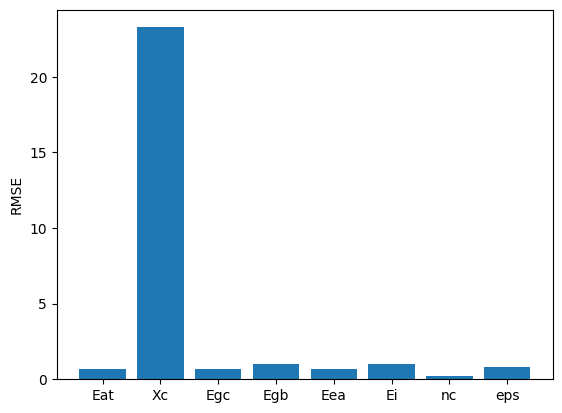

In [ ]:
import numpy as np
import pandas as pd
from rdkit import Chem, DataStructs
from rdkit.Chem import AllChem
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from tensorflow.keras.layers import Input, Dense, Concatenate, Dropout, PReLU
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

property_names = ['Eat', 'Xc', 'Egc', 'Egb', 'Eea', 'Ei', 'nc', 'eps']
selector_vectors = np.eye(len(property_names))

def build_nn_mt2_model():
    fingerprint_input = Input(shape=(4096,), name='fingerprint_input')
    selector_input = Input(shape=(8,), name='selector_input')
    x = Concatenate()([fingerprint_input, selector_input])
    x = Dense(224)(x)
    x = PReLU()(x)
    x = Dense(160)(x)
    x = PReLU()(x)
    x = Dropout(0.5)(x)
    x = Dense(8)(x)
    output = Dense(1)(x)
    model = Model(inputs=[fingerprint_input, selector_input], outputs=output)
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Assuming 'data' variable contains the preprocessed dataset with pg_fp fingerprints
property_names = ['Eat', 'Xc', 'Egc', 'Egb', 'Eea', 'Ei', 'nc', 'eps']
property_data = {property_name: data[data['property'] == property_name] for property_name in property_names}

kf = KFold(n_splits=5)
rmse_scores = {prop: [] for prop in property_names}

for prop, selector_vector in zip(property_names, selector_vectors):
    prop_data = property_data[prop]
    X = np.array(list(prop_data['pg_fp']))
    y = prop_data['value'].values.reshape(-1, 1)
    
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        model = build_nn_mt2_model()

        selector_train = np.tile(selector_vector, (len(X_train), 1))
        selector_test = np.tile(selector_vector, (len(X_test), 1))
        
        model.fit([X_train, selector_train], y_train, epochs=100, batch_size=32, verbose=0)
        y_pred = model.predict([X_test, selector_test])

        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        rmse_scores[prop].append(rmse)

# Calculate mean RMSE for each property
mean_rmse_scores = {prop: np.mean(rmse_scores[prop]) for prop in property_names}

# Print RMSE for each property and store them in a list
nn_mt2_sup_rmse_values = []
for prop, rmse in mean_rmse_scores.items():
    print(f'RMSE for {prop}: {rmse}')
    nn_mt2_sup_rmse_values.append(rmse)

# Save the results to a CSV file
with open('nn_mt2_sup_rmse_results.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    # Write the header
    writer.writerow(['Property', 'RMSE'])
    # Write the data
    writer.writerows(mean_rmse_scores.items())


# Plot RMSE
plt.bar(range(len(mean_rmse_scores)), list(mean_rmse_scores.values()), align='center')
plt.xticks(range(len(mean_rmse_scores)), list(mean_rmse_scores.keys()))
plt.ylabel('RMSE')
plt.savefig('pg_nn_mt2_sup_rmse_plot.png', format='png', dpi=300)
plt.show()



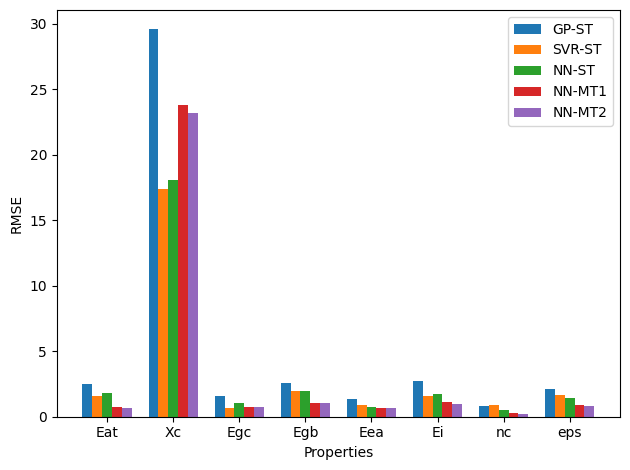

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# The RMSE values for each property for all the models are calculated
# and stored in the following lists:
# gp_st_rmse_values
# nn_st_rmse_values
# nn_mt1_rmse_values
# nn_mt2_all_rmse_values
# nn_mt2_sup_rmse_values

property_names = ['Eat', 'Xc', 'Egc', 'Egb', 'Eea', 'Ei', 'nc', 'eps']

x = np.arange(len(property_names))
width = 0.15

fig, ax = plt.subplots()
rects1 = ax.bar(x - 2 * width, gp_st_rmse_values, width, label='GP-ST')
rects2 = ax.bar(x - width, nn_st_rmse_values, width, label='SVR-ST')
rects3 = ax.bar(x, nn_mt1_rmse_values, width, label='NN-ST')
rects4 = ax.bar(x + width, nn_mt2_all_rmse_values, width, label='NN-MT1')
rects5 = ax.bar(x + 2 * width, nn_mt2_sup_rmse_values, width, label='NN-MT2')

ax.set_ylabel('RMSE')
ax.set_xlabel('Properties')
#ax.set_title('RMSE for All ML models')
ax.set_xticks(x)
ax.set_xticklabels(property_names)
ax.legend()

fig.tight_layout()
plt.savefig('all_rmse_plot.png', format='png', dpi=300)
plt.show()


                 Eat        Xc       Egc       Egb       Eea        Ei  \
GP-ST       0.904411  0.274277  0.134739  0.228944  0.237365  0.320160   
NN-ST       0.891684  0.176510  0.069448  0.202479  0.183293  0.256624   
NN-MT1      0.997052  0.182989  0.103714  0.200984  0.149046  0.281815   
NN-MT2-all  0.408382  0.241466  0.075656  0.108579  0.145368  0.177707   
NN-MT2-sup  0.382021  0.235908  0.071621  0.104246  0.139662  0.156921   

                  nc       eps   Average  
GP-ST       0.380928  0.253887  0.341839  
NN-ST       0.621847  0.256811  0.332337  
NN-MT1      0.362603  0.220845  0.312381  
NN-MT2-all  0.169782  0.138587  0.183191  
NN-MT2-sup  0.139563  0.130297  0.170030  


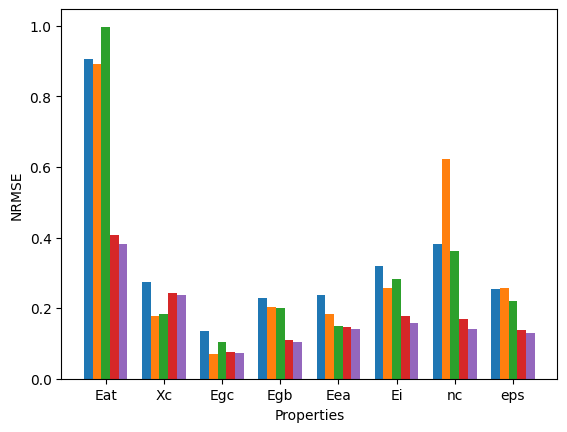

In [ ]:
import pandas as pd

# Assuming 'data' variable contains the preprocessed dataset with pg_fp fingerprints
property_data = {property_name: data[data['property'] == property_name] for property_name in property_names}

# Calculate the range (max - min) of each property's values
property_ranges = {prop: property_data[prop]['value'].max() - property_data[prop]['value'].min() for prop in property_names}

# gp_st_rmse_values
# nn_st_rmse_values
# nn_mt1_rmse_values
# nn_mt2_all_rmse_values
# nn_mt2_sup_rmse_values

# Calculate NRMSE for each ML model and property
gp_st_nrmse_values = [rmse / property_ranges[prop] for prop, rmse in zip(property_names, gp_st_rmse_values)]
nn_st_nrmse_values = [rmse / property_ranges[prop] for prop, rmse in zip(property_names, nn_st_rmse_values)]
nn_mt1_nrmse_values = [rmse / property_ranges[prop] for prop, rmse in zip(property_names, nn_mt1_rmse_values)]
nn_mt2_all_nrmse_values = [rmse / property_ranges[prop] for prop, rmse in zip(property_names, nn_mt2_all_rmse_values)]
nn_mt2_sup_nrmse_values = [rmse / property_ranges[prop] for prop, rmse in zip(property_names, nn_mt2_sup_rmse_values)]

# Calculate the average NRMSE for all properties
models_nrmse_avg = {
    'GP-ST': np.mean(gp_st_nrmse_values),
    'NN-ST': np.mean(nn_st_nrmse_values),
    'NN-MT1': np.mean(nn_mt1_nrmse_values),
    'NN-MT2-all': np.mean(nn_mt2_all_nrmse_values),
    'NN-MT2-sup': np.mean(nn_mt2_sup_nrmse_values)
}

# Create a DataFrame to display the NRMSE values in a table
nrmse_table = pd.DataFrame(
    [gp_st_nrmse_values, nn_st_nrmse_values, nn_mt1_nrmse_values, nn_mt2_all_nrmse_values, nn_mt2_sup_nrmse_values],
    columns=property_names,
    index=['GP-ST', 'NN-ST', 'NN-MT1', 'NN-MT2-all', 'NN-MT2-sup']
)
nrmse_table['Average'] = nrmse_table.mean(axis=1)

# Print the NRMSE table
print(nrmse_table)

# Save the NRMSE table to a CSV file
nrmse_table.to_csv('nrmse_table.csv')

# Plot the NRMSE for each ML model and property
x = np.arange(len(property_names))
width = 0.15

fig, ax = plt.subplots()
rects1 = ax.bar(x - 2 * width, gp_st_nrmse_values, width, label='GP-ST')
rects2 = ax.bar(x - width, nn_st_nrmse_values, width, label='NN-ST')
rects3 = ax.bar(x, nn_mt1_nrmse_values, width, label='NN-MT1')
rects4 = ax.bar(x + width, nn_mt2_all_nrmse_values, width, label='NN-MT2-all')
rects5 = ax.bar(x + 2 * width, nn_mt2_sup_nrmse_values, width, label='NN-MT2-sup')

ax.set_ylabel('NRMSE')
ax.set_xlabel('Properties')
#ax.set_title('NRMSE for different ML models')
ax.set_xticks(x)
ax.set_xticklabels(property_names)
# Save the NRMSE figure to an image file
fig.savefig('nrmse_figure.png')
